# 1. Getting VizDoom Up and Running

In [ ]:
!pip install vizdoom matplotlib

In [ ]:
!cd Github_VizDoom & git clone https://github.com/mwydmuch/ViZDoom

In [ ]:
!pip install gym opencv-python

In [1]:
# Import vizdoom for game env
from vizdoom import *
# Import random for action sampling
import random
# Import time for sleeping
import time
# Import numpy for identitiy matrix
import numpy as np

In [10]:
# Setup game
game = DoomGame()
game.load_config('Github_VizDoom/VizDoom/scenarios/basic.cfg')
game.init()

In [11]:
# This is the set of actions that we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [12]:
# Loop through episodes
episodes = 10
for episode in range(episodes):
    # Create new episode or game
    game.new_episode()
    # Chech the game isn't done
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        # Game variables - Ammo
        info = state.game_variables
        reward = game.make_action(random.choice(actions))
        #print("reward:", reward)
        time.sleep(0.02)
    print("Result:", game.get_total_reward())
    print("--------------------------------")
    time.sleep(2)    

Result: 95.0
--------------------------------
Result: 95.0
--------------------------------
Result: -385.0
--------------------------------
Result: -168.0
--------------------------------


KeyboardInterrupt: 

In [13]:
game.close()

# 2. Converting it to a Gym Environment

In [2]:
#Import Environment base class from OpenAI Gym
from gym import Env
#Import gym spaces
from gym.spaces import Discrete, Box
#Import opencv
import cv2

In [3]:
#Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env):
    
    #Function that is called when we start the env
    def __init__(self, render=False):
        
        #Inherit from Env
        super().__init__()
        
        #Setup the game
        self.game = DoomGame()
        self.game.load_config('Github_VizDoom/VizDoom/scenarios/basic.cfg')
             
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        #Start the game
        self.game.init()
        
        #Create the action space and observation space
        self.observation_space = Box(low=0,high=255, shape=(100,160,1), dtype=np.uint8)
        self.action_space = Discrete(3)
        
    #This is how we take a step in the environment
    def step(self, action):
        
        #Specify action and take step
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        
        #Get all the other stuff we need to return
        if self.game.get_state():
            
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
            
        info = {"info": info}    
        done = self.game.is_episode_finished()
        
        return state, reward, done, info
    
    #Define how to render the game or environmet
    def render():
        
        pass
    
    #What happens when we start a new game
    def reset(self):
        
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    #Graysclae the game frame and resize it
    def grayscale(self, observation):
        
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation = cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    #Call to close down the game
    def close(self):
        self.game.close()

# 3. View Game State

In [4]:
env = VizDoomGym(render = False)

In [5]:
state = env.reset()

In [6]:
state.shape

(100, 160, 1)

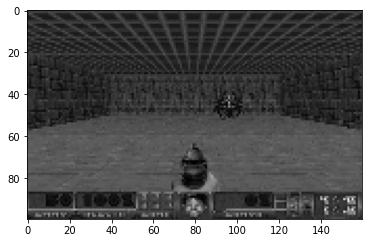

In [7]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [8]:
env.close()

In [13]:
env = VizDoomGym(render = False)

In [14]:
#Import Environment checker
from stable_baselines3.common import env_checker

In [15]:
env_checker.check_env(env)

In [16]:
env.close()

# 4. Setup Callback

In [121]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/cu117/torch-2.0.1%2Bcu117-cp39-cp39-win_amd64.whl (2343.7 MB)
  Using cached https://download.pytorch.org/whl/cu117/torchvision-0.15.2%2Bcu117-cp39-cp39-win_amd64.whl (4.9 MB)
  Using cached https://download.pytorch.org/whl/cu117/torchaudio-2.0.2%2Bcu117-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached https://download.pytorch.org/whl/MarkupSafe-2.1.2-cp39

You should consider upgrading via the 'C:\Users\tarik\OneDrive\Masaüstü\Python\Python ile Veri Bilimi\Nicholas Renotte - Youtube Tutorials\DoomAi\vizdoom\Scripts\python.exe -m pip install --upgrade pip' command.


In [123]:
!pip install stable-baselines3[extra]

You should consider upgrading via the 'C:\Users\tarik\OneDrive\Masaüstü\Python\Python ile Veri Bilimi\Nicholas Renotte - Youtube Tutorials\DoomAi\vizdoom\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
#Import os for file path managment
import os
#Import PPO for algos
from stable_baselines3 import PPO, DQN
#Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [5]:
#Save our models every x steps
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [6]:
CHECKPOINT_DIR = "./train/train_basic/DQN"
LOG_DIR = "./logs/log_basic/"

In [7]:
callback = TrainAndLoggingCallback(check_freq=70000, save_path=CHECKPOINT_DIR)

# 5. Train Model

In [8]:
#Non renderend environment
env = VizDoomGym(render = False)

In [57]:
model = PPO("CnnPolicy", env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [9]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, batch_size=64, buffer_size=10000, learning_starts=2000, gamma=.95)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [10]:
model.learn(total_timesteps=70000, callback=callback)

Logging to ./logs/log_basic/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 0.75     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 283      |
|    time_elapsed     | 0        |
|    total_timesteps  | 86       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 145      |
|    time_elapsed     | 0        |
|    total_timesteps  | 129      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.6     |
|    ep_rew_mean      | -27      |
|    exploration_rate | 0.962    |
| time/              

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | -32.8    |
|    exploration_rate | 0.713    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 146      |
|    time_elapsed     | 14       |
|    total_timesteps  | 2113     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92     |
|    n_updates        | 28       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | -37      |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 132      |
|    time_elapsed     | 17       |
|    total_timesteps  | 2267     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.4     |
|    ep_rew_mean      | -64.9    |
|    exploration_rate | 0.421    |
| time/               |          |
|    episodes         | 152      |
|    fps              | 75       |
|    time_elapsed     | 56       |
|    total_timesteps  | 4267     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27     |
|    n_updates        | 566      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.3     |
|    ep_rew_mean      | -70.3    |
|    exploration_rate | 0.402    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 74       |
|    time_elapsed     | 59       |
|    total_timesteps  | 4403     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.671    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.4     |
|    ep_rew_mean      | -84.3    |
|    exploration_rate | 0.123    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 63       |
|    time_elapsed     | 102      |
|    total_timesteps  | 6465     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates        | 1116     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.5     |
|    ep_rew_mean      | -97      |
|    exploration_rate | 0.0819   |
| time/               |          |
|    episodes         | 220      |
|    fps              | 62       |
|    time_elapsed     | 108      |
|    total_timesteps  | 6765     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.3     |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 57       |
|    time_elapsed     | 155      |
|    total_timesteps  | 9002     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.439    |
|    n_updates        | 1750     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.4     |
|    ep_rew_mean      | -107     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 57       |
|    time_elapsed     | 156      |
|    total_timesteps  | 9033     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.565    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.5     |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 50       |
|    time_elapsed     | 229      |
|    total_timesteps  | 11656    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.76     |
|    n_updates        | 2413     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.1     |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 50       |
|    time_elapsed     | 236      |
|    total_timesteps  | 11945    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.3     |
|    ep_rew_mean      | -245     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 48       |
|    time_elapsed     | 335      |
|    total_timesteps  | 16192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88     |
|    n_updates        | 3547     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67       |
|    ep_rew_mean      | -255     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 48       |
|    time_elapsed     | 341      |
|    total_timesteps  | 16492    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.473    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | -255     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 46       |
|    time_elapsed     | 438      |
|    total_timesteps  | 20333    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74     |
|    n_updates        | 4583     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | -254     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 46       |
|    time_elapsed     | 444      |
|    total_timesteps  | 20631    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.299    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.4     |
|    ep_rew_mean      | -215     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 46       |
|    time_elapsed     | 514      |
|    total_timesteps  | 24124    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.143    |
|    n_updates        | 5530     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | -219     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 46       |
|    time_elapsed     | 520      |
|    total_timesteps  | 24424    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.254    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.8     |
|    ep_rew_mean      | -234     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 45       |
|    time_elapsed     | 623      |
|    total_timesteps  | 28220    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.159    |
|    n_updates        | 6554     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.8     |
|    ep_rew_mean      | -224     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 604      |
|    fps              | 45       |
|    time_elapsed     | 625      |
|    total_timesteps  | 28306    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.234    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61       |
|    ep_rew_mean      | -224     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 44       |
|    time_elapsed     | 721      |
|    total_timesteps  | 32165    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2        |
|    n_updates        | 7541     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62       |
|    ep_rew_mean      | -229     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 44       |
|    time_elapsed     | 728      |
|    total_timesteps  | 32427    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.236    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | -197     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 44       |
|    time_elapsed     | 805      |
|    total_timesteps  | 35649    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01     |
|    n_updates        | 8412     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.5     |
|    ep_rew_mean      | -209     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 44       |
|    time_elapsed     | 811      |
|    total_timesteps  | 35894    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.171    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.6     |
|    ep_rew_mean      | -157     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 44       |
|    time_elapsed     | 875      |
|    total_timesteps  | 38734    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02     |
|    n_updates        | 9183     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48       |
|    ep_rew_mean      | -147     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 44       |
|    time_elapsed     | 877      |
|    total_timesteps  | 38870    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.206    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.7     |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 44       |
|    time_elapsed     | 942      |
|    total_timesteps  | 41698    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates        | 9924     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.1     |
|    ep_rew_mean      | -144     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 44       |
|    time_elapsed     | 946      |
|    total_timesteps  | 41927    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.8     |
|    ep_rew_mean      | -111     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 920      |
|    fps              | 44       |
|    time_elapsed     | 999      |
|    total_timesteps  | 44010    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36     |
|    n_updates        | 10502    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.7     |
|    ep_rew_mean      | -99.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 924      |
|    fps              | 44       |
|    time_elapsed     | 1000     |
|    total_timesteps  | 44078    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.425    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | -5.81    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 984      |
|    fps              | 44       |
|    time_elapsed     | 1019     |
|    total_timesteps  | 44901    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39     |
|    n_updates        | 10725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 6.53     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 988      |
|    fps              | 44       |
|    time_elapsed     | 1019     |
|    total_timesteps  | 44922    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 33.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1048     |
|    fps              | 43       |
|    time_elapsed     | 1046     |
|    total_timesteps  | 45848    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8      |
|    n_updates        | 10961    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 35.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1052     |
|    fps              | 43       |
|    time_elapsed     | 1047     |
|    total_timesteps  | 45900    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1112     |
|    fps              | 43       |
|    time_elapsed     | 1076     |
|    total_timesteps  | 47018    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.086    |
|    n_updates        | 11254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 43       |
|    time_elapsed     | 1077     |
|    total_timesteps  | 47078    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.83     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 5.49     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 43       |
|    time_elapsed     | 1110     |
|    total_timesteps  | 48305    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12     |
|    n_updates        | 11576    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 4.81     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 43       |
|    time_elapsed     | 1110     |
|    total_timesteps  | 48331    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 43       |
|    time_elapsed     | 1129     |
|    total_timesteps  | 48970    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22     |
|    n_updates        | 11742    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 35       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 43       |
|    time_elapsed     | 1131     |
|    total_timesteps  | 49046    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.82     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 43       |
|    time_elapsed     | 1159     |
|    total_timesteps  | 50187    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39     |
|    n_updates        | 12046    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 43       |
|    time_elapsed     | 1164     |
|    total_timesteps  | 50330    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.2     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 6.76     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1368     |
|    fps              | 43       |
|    time_elapsed     | 1186     |
|    total_timesteps  | 51184    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.21     |
|    n_updates        | 12295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 7.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 43       |
|    time_elapsed     | 1187     |
|    total_timesteps  | 51230    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 39.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 43       |
|    time_elapsed     | 1208     |
|    total_timesteps  | 52027    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.619    |
|    n_updates        | 12506    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 43       |
|    time_elapsed     | 1211     |
|    total_timesteps  | 52081    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 24.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 42       |
|    time_elapsed     | 1238     |
|    total_timesteps  | 53076    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.41     |
|    n_updates        | 12768    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 24.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 42       |
|    time_elapsed     | 1238     |
|    total_timesteps  | 53084    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.89     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 15.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1560     |
|    fps              | 42       |
|    time_elapsed     | 1262     |
|    total_timesteps  | 54089    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates        | 13022    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1564     |
|    fps              | 42       |
|    time_elapsed     | 1263     |
|    total_timesteps  | 54127    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1624     |
|    fps              | 42       |
|    time_elapsed     | 1282     |
|    total_timesteps  | 54810    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.52     |
|    n_updates        | 13202    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 51.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1628     |
|    fps              | 42       |
|    time_elapsed     | 1282     |
|    total_timesteps  | 54823    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.13     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1688     |
|    fps              | 42       |
|    time_elapsed     | 1306     |
|    total_timesteps  | 55817    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.61     |
|    n_updates        | 13454    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 42       |
|    time_elapsed     | 1307     |
|    total_timesteps  | 55826    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 36       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1752     |
|    fps              | 42       |
|    time_elapsed     | 1330     |
|    total_timesteps  | 56634    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43     |
|    n_updates        | 13658    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 34.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 42       |
|    time_elapsed     | 1331     |
|    total_timesteps  | 56676    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1816     |
|    fps              | 42       |
|    time_elapsed     | 1351     |
|    total_timesteps  | 57471    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2        |
|    n_updates        | 13867    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 42       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1820     |
|    fps              | 42       |
|    time_elapsed     | 1351     |
|    total_timesteps  | 57479    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.97     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 42       |
|    time_elapsed     | 1369     |
|    total_timesteps  | 58219    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates        | 14054    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1884     |
|    fps              | 42       |
|    time_elapsed     | 1373     |
|    total_timesteps  | 58349    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 42       |
|    time_elapsed     | 1398     |
|    total_timesteps  | 59378    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.47     |
|    n_updates        | 14344    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 42       |
|    time_elapsed     | 1398     |
|    total_timesteps  | 59386    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2008     |
|    fps              | 42       |
|    time_elapsed     | 1422     |
|    total_timesteps  | 60386    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.85     |
|    n_updates        | 14596    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2012     |
|    fps              | 42       |
|    time_elapsed     | 1422     |
|    total_timesteps  | 60394    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 42       |
|    time_elapsed     | 1443     |
|    total_timesteps  | 61232    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07     |
|    n_updates        | 14807    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 42       |
|    time_elapsed     | 1445     |
|    total_timesteps  | 61313    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.74     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 42       |
|    time_elapsed     | 1457     |
|    total_timesteps  | 61850    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44     |
|    n_updates        | 14962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.36     |
|    ep_rew_mean      | 54.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 42       |
|    time_elapsed     | 1458     |
|    total_timesteps  | 61879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2200     |
|    fps              | 42       |
|    time_elapsed     | 1473     |
|    total_timesteps  | 62651    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.63     |
|    n_updates        | 15162    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 44.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 42       |
|    time_elapsed     | 1474     |
|    total_timesteps  | 62659    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2264     |
|    fps              | 42       |
|    time_elapsed     | 1492     |
|    total_timesteps  | 63295    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.28     |
|    n_updates        | 15323    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 44.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2268     |
|    fps              | 42       |
|    time_elapsed     | 1492     |
|    total_timesteps  | 63303    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2328     |
|    fps              | 42       |
|    time_elapsed     | 1516     |
|    total_timesteps  | 64131    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.6      |
|    n_updates        | 15532    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 38       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 42       |
|    time_elapsed     | 1517     |
|    total_timesteps  | 64169    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2392     |
|    fps              | 42       |
|    time_elapsed     | 1536     |
|    total_timesteps  | 64828    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 15706    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 42       |
|    time_elapsed     | 1536     |
|    total_timesteps  | 64843    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 38.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 42       |
|    time_elapsed     | 1557     |
|    total_timesteps  | 65662    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5      |
|    n_updates        | 15915    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 39.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2460     |
|    fps              | 42       |
|    time_elapsed     | 1558     |
|    total_timesteps  | 65707    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 53.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2520     |
|    fps              | 42       |
|    time_elapsed     | 1572     |
|    total_timesteps  | 66234    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.74     |
|    n_updates        | 16058    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2524     |
|    fps              | 42       |
|    time_elapsed     | 1574     |
|    total_timesteps  | 66336    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 41.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2584     |
|    fps              | 42       |
|    time_elapsed     | 1594     |
|    total_timesteps  | 67057    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 16264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 40.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2588     |
|    fps              | 42       |
|    time_elapsed     | 1595     |
|    total_timesteps  | 67085    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 41       |
|    time_elapsed     | 1613     |
|    total_timesteps  | 67667    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1      |
|    n_updates        | 16416    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 44.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2652     |
|    fps              | 41       |
|    time_elapsed     | 1614     |
|    total_timesteps  | 67736    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.87     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 53.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2712     |
|    fps              | 41       |
|    time_elapsed     | 1630     |
|    total_timesteps  | 68343    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.48     |
|    n_updates        | 16585    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 53.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2716     |
|    fps              | 41       |
|    time_elapsed     | 1631     |
|    total_timesteps  | 68374    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 34.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2776     |
|    fps              | 41       |
|    time_elapsed     | 1656     |
|    total_timesteps  | 69323    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91     |
|    n_updates        | 16830    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 34.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2780     |
|    fps              | 41       |
|    time_elapsed     | 1656     |
|    total_timesteps  | 69348    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 51.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2840     |
|    fps              | 41       |
|    time_elapsed     | 1669     |
|    total_timesteps  | 69842    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates        | 16960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.69     |
|    ep_rew_mean      | 59.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2844     |
|    fps              | 41       |
|    time_elapsed     | 1670     |
|    total_timesteps  | 69877    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates      

# 6. Test the Model

In [11]:
#Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [12]:
model = DQN.load(os.path.join('./train/train_basic/DQN', 'best_model_70000'))

In [13]:
env = VizDoomGym(render = True)

In [17]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes = 10)

In [18]:
mean_reward

-27.2

In [26]:
env.close()

In [43]:
env = VizDoomGym(render = True)

In [66]:
for episode in range(100): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.05)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(1)

Total Reward for episode 83.0 is 0
Total Reward for episode 95.0 is 1
Total Reward for episode 95.0 is 2
Total Reward for episode 87.0 is 3
Total Reward for episode 75.0 is 4
Total Reward for episode 95.0 is 5
Total Reward for episode 95.0 is 6
Total Reward for episode 67.0 is 7
Total Reward for episode 95.0 is 8
Total Reward for episode 71.0 is 9
Total Reward for episode 95.0 is 10
Total Reward for episode 87.0 is 11
Total Reward for episode 95.0 is 12
Total Reward for episode 95.0 is 13


KeyboardInterrupt: 

In [24]:
env.close()